In [21]:
import matplotlib.pyplot as plt
from kuibit.simdir import SimDir
import kuibit.visualize_matplotlib as viz
import scipy.signal
import numpy as np
from scipy.optimize import curve_fit

%matplotlib widget

datadir = '/home/lorenzo/simulations/TOVTest_Base'
datadirG = '/home/lorenzo/simulations/TOVTest_EOSOmniGeneral'
datadirG2 = '/home/lorenzo/simulations/TOVTest_EOSOmniGeneral2'
sim = SimDir(datadir)
simG = SimDir(datadirG)
# simG2 = SimDir(datadirG2)

# This will print a list with all the data available
# print(sim)

rho  = sim.timeseries.maximum['rho']
rhoG = simG.timeseries.maximum['rho']
# rhoG2 = simG2.timeseries.maximum['rho']
time = rho.t
timeG = rhoG.t
# timeG2 = rhoG2.t
rho = rho.to_numpy()
rho /= rho[0]
rhoG = rhoG.to_numpy()
rhoG /= rhoG[0]
# rhoG2 = rhoG2.to_numpy()
# rhoG2 /= rhoG2[0]

dt = time[1] - time[0]
dtG = timeG[1] - timeG[0]
# dtG2 = timeG2[1] - timeG2[0]




def f1(x, a, b):
    return a*x*x + b*x + 1
    
def f2(x, a, b, c):
    return a*x**3 + b*x**2 + c*x +1

def f3(x, a, b):
    return a*x**2 + b*x + 1

popt, pcov = curve_fit(f1, time, rho)
poptG, pcovG = curve_fit(f2, timeG, rhoG/rhoG[0])
# poptG2, pcovG2 = curve_fit(f3, timeG2, rhoG2)


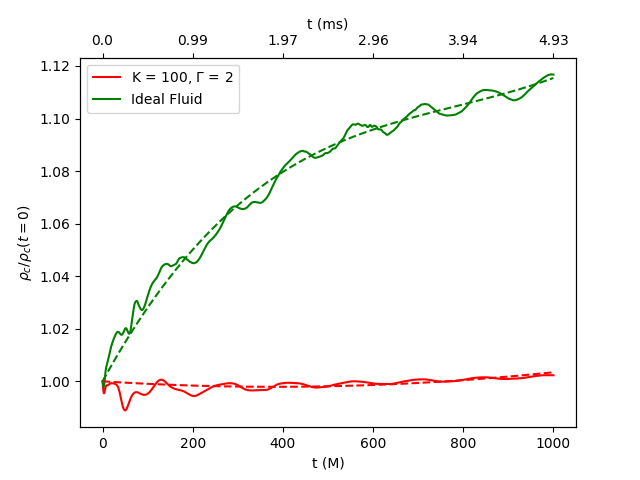

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(time, rho, 'r', label=r'K = 100, $\Gamma$ = 2')
ax1.plot(timeG, rhoG, 'g', label = 'Ideal Fluid')
# ax1.plot(timeG2, rhoG2, 'b', label = 'BHB_lEOS_rho234_temp180_ye60_version_1.02_20140422')

ax1.plot(time, f1(time, *popt), 'r--')
ax1.plot(timeG, f2(timeG, *poptG), 'g--')
# ax1.plot(timeG2, f3(timeG, *poptG), 'g--')

ax2.set_xticks( ax1.get_xticks() )
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels([round(x/203,2) for x in ax1.get_xticks()])
ax2.set_xlabel('t (ms)')
ax1.set_xlabel('t (M)')
ax1.set_ylabel(r'$\rho_c / \rho_c(t=0)$')


ax1.legend()

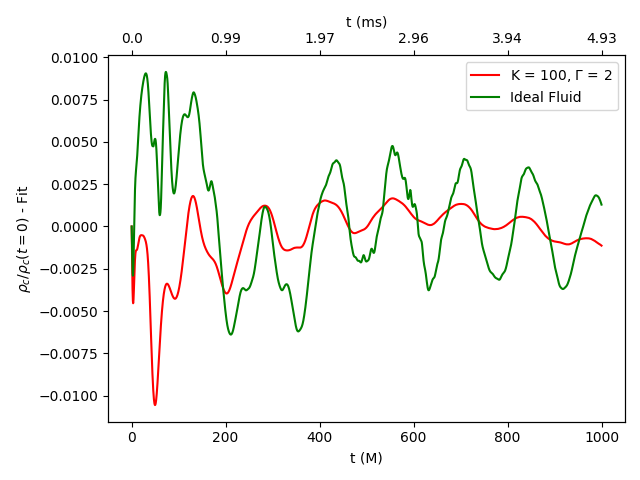

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.plot(time, rho - f1(time, *popt), 'r',label=r'K = 100, $\Gamma$ = 2')
ax1.plot(timeG, rhoG - f2(timeG, *poptG), 'g', label = 'Ideal Fluid')
# ax1.plot(timeG2, rhoG2 - f3(timeG2), '--', label = 'HShenEOS_rho220_temp180_ye65_version_1.1_20120817')

ax2.set_xticks( ax1.get_xticks() )
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels([round(x/203,2) for x in ax1.get_xticks()])
ax2.set_xlabel('t (ms)')
ax1.set_xlabel('t (M)')
ax1.set_ylabel(r'$\rho_c / \rho_c(t=0)$ - Fit')

ax1.legend()
plt.tight_layout()

(1e-18, 0.0001)

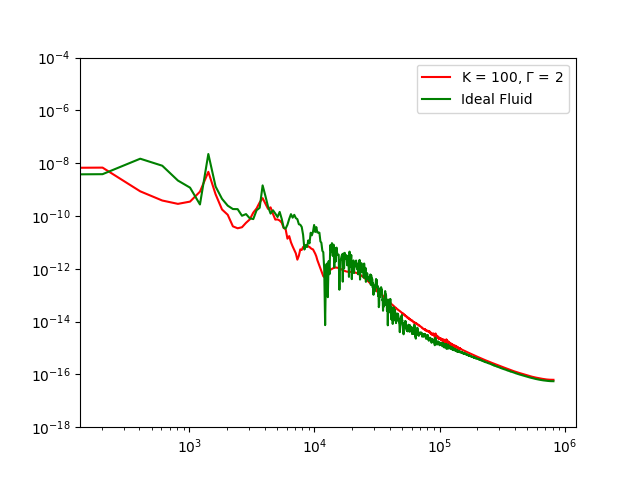

In [22]:
f, S = scipy.signal.periodogram(rho - f1(time, *popt), 1000*203/dt, scaling='density')
fG, SG = scipy.signal.periodogram(rhoG - f2(timeG, *poptG), 1000*203/dtG, scaling='density')
# fG2, SG2 = scipy.signal.periodogram(rhoG2 - f3(timeG2), 1000*203/dtG2, scaling='density')

fig = plt.figure()
plt.plot(f,S, 'r', label=r'K = 100, $\Gamma$ = 2')
plt.plot(fG,SG, 'g', label = 'Ideal Fluid')
# plt.plot(fG2, SG2, label = 'HShenEOS_rho220_temp180_ye65_version_1.1_20120817')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim((10**(-18), 10**(-4)))

In [20]:
# press = simG.timeseries.maximum['press']
# TrhoG = simG.timeseries.maximum['rho']
# # Polytropic constants
# K, Gamma = 100, 2

# # Timeseries in kuibit support all the algebraic operations
# cold_press = K * TrhoG**Gamma

# fig = plt.figure()
# plt.ylabel("Pressure")
# plt.xlabel("Time")
# plt.plot(time, cold_press, label="cold_press")
# plt.plot(press.t, press, label="press", ls="dashed")
# plt.legend()

# plt.tight_layout()